# **Avg. IQ Between Countries - Analysis** 🧠

# **Introduction** 🤵🏽‍♂️

In this project, we delve into the relationship between a nation's average IQ and key socio-economic indicators. Our dataset encompasses a diverse array of variables, including Average IQ, Literacy Rate, Nobel Prizes, Human Development Index (HDI), Mean Years of Schooling, Gross National Income (GNI), and Population. By examining these factors, we aim to uncover patterns, correlations, and potential insights that shed light on the interplay between intelligence, education, and economic development on a global scale. As we navigate through the data, we will employ statistical methods, regression analyses, and visualizations to unravel the nuanced connections between Average IQ and socio-economic variables. Our exploration extends beyond mere correlations, seeking to discern underlying trends, outliers, and regional disparities.
 By undertaking this investigation, we strive to contribute valuable insights into the multifaceted dynamics that link intelligence to the broader fabric of societal well-being. Through rigorous examination and interpretation of the data, we endeavor to provide a nuanced understanding of the factors influencing cognitive abilities and their implications for nations' development.
 Join us on this analytical journey as we unravel the layers of intelligence, education, and prosperity, and explore the data-driven narratives that shape our global landscape.


- What is the highest and lowest country with Agerage IQ?
- What is the highest and lowest continent with Averager IQ?
- What is the number of Nobel Prices for each continent?
- What is the most effective variable in Average IQ?
- Is there a correlation between Avg IQ and number of the Nobel Prices?

# **Import libraries** ⚙️

In [1]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 45.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import pycountry
from geopy.geocoders import Nominatim
import plotly.express as px
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import  statsmodels.stats.outliers_influence as oi

# **Read the dataset** 📖

In [3]:
iq_data = pd.read_csv("/kaggle/input/iq-cleaned-dataset/IQ_clean.csv")

**Data Info**

In [4]:
iq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          193 non-null    object 
 1   Continent        193 non-null    object 
 2   population_2023  193 non-null    object 
 3   Rank             193 non-null    float64
 4   Avg_IQ           193 non-null    float64
 5   Literacy_Rate    193 non-null    float64
 6   Nobel_Prices     193 non-null    float64
 7   HDI_2021         193 non-null    float64
 8   MYS_2021         193 non-null    float64
 9   GNI_2021         193 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.2+ KB


**Data describe**

In [5]:
iq_data.describe()

,Rank,Avg_IQ,Literacy_Rate,Nobel_Prices,HDI_2021,MYS_2021,GNI_2021
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,82.047927,0.864249,5.922280,0.725644,9.059136,20800.618330
std,55.858452,13.336117,0.180262,31.971328,0.153814,3.210445,21709.422984
min,1.000000,42.990000,0.190000,0.000000,0.385000,2.100000,-6430.550111
25%,49.000000,74.330000,0.800000,0.000000,0.602000,6.400000,4624.000000
50%,97.000000,82.240000,0.950000,0.000000,0.745000,9.535914,13021.000000
75%,145.000000,91.600000,0.990000,1.000000,0.846000,11.600000,31033.000000
max,193.000000,106.480000,1.000000,400.000000,0.981000,14.100000,146830.000000


**Subset of numeric data**

In [6]:
num_data = iq_data.select_dtypes(include = "number")

# **Visualization** 📊

## **1. Box Plots** 📦

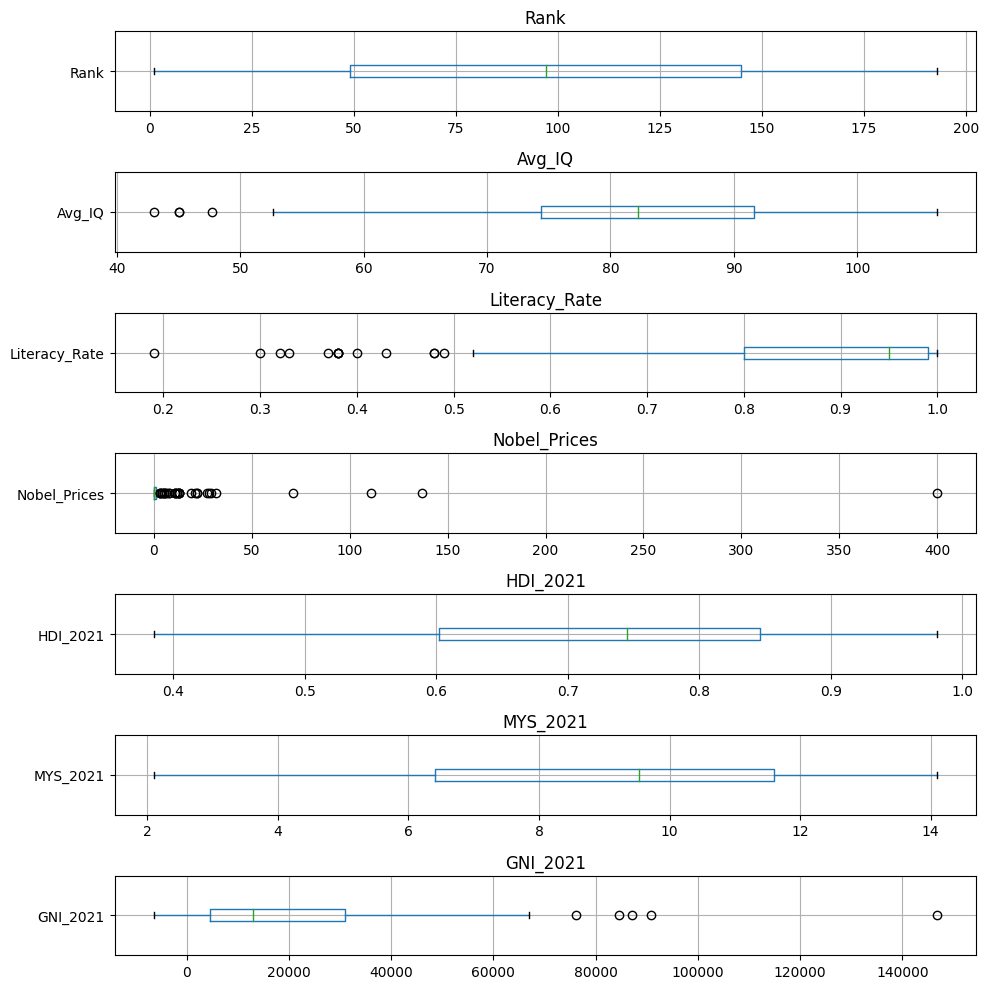

In [7]:
fig, axes = plt.subplots(nrows = len(num_data.columns), figsize = (10, 10), sharex = False)

for i, column in enumerate(num_data.columns):
    num_data.boxplot(column, ax=axes[i], vert = False)
    axes[i].set_title(column)
    
plt.tight_layout()
plt.show()

## **2. Histograms** 📊

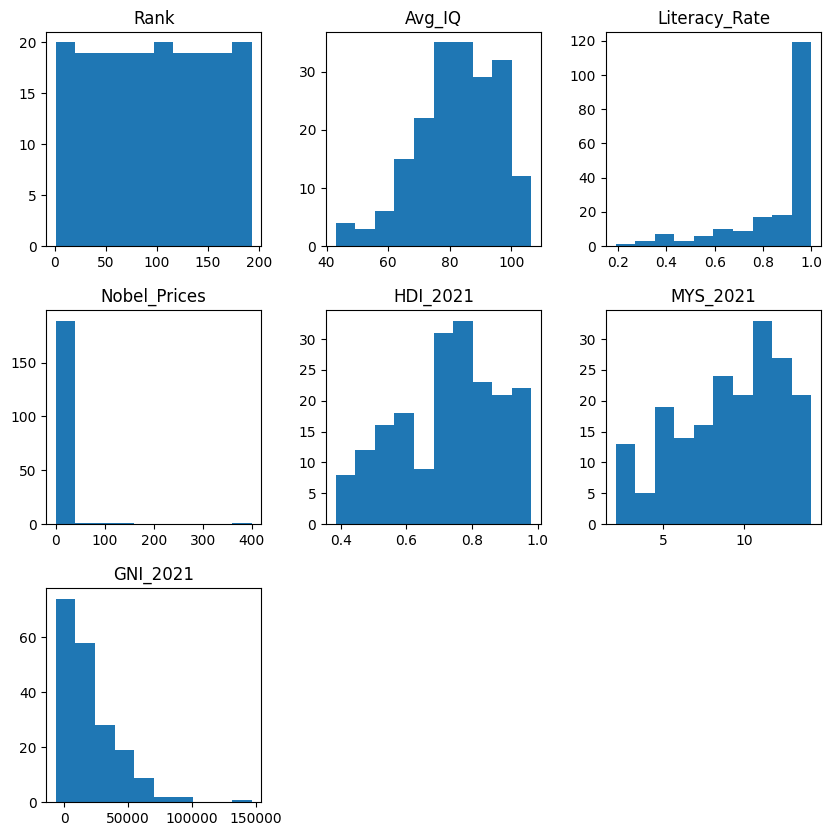

In [8]:
iq_data.hist(figsize = (10,10), grid=False)
plt.show()

- **Avg_IQ aproxomatly normal**
- **Literacy_rate left skew with outliers**
- **HDI and MYS aprox. normal**
- **GNI right skew wiht some outliers** 

## **Scatter plot matrix**

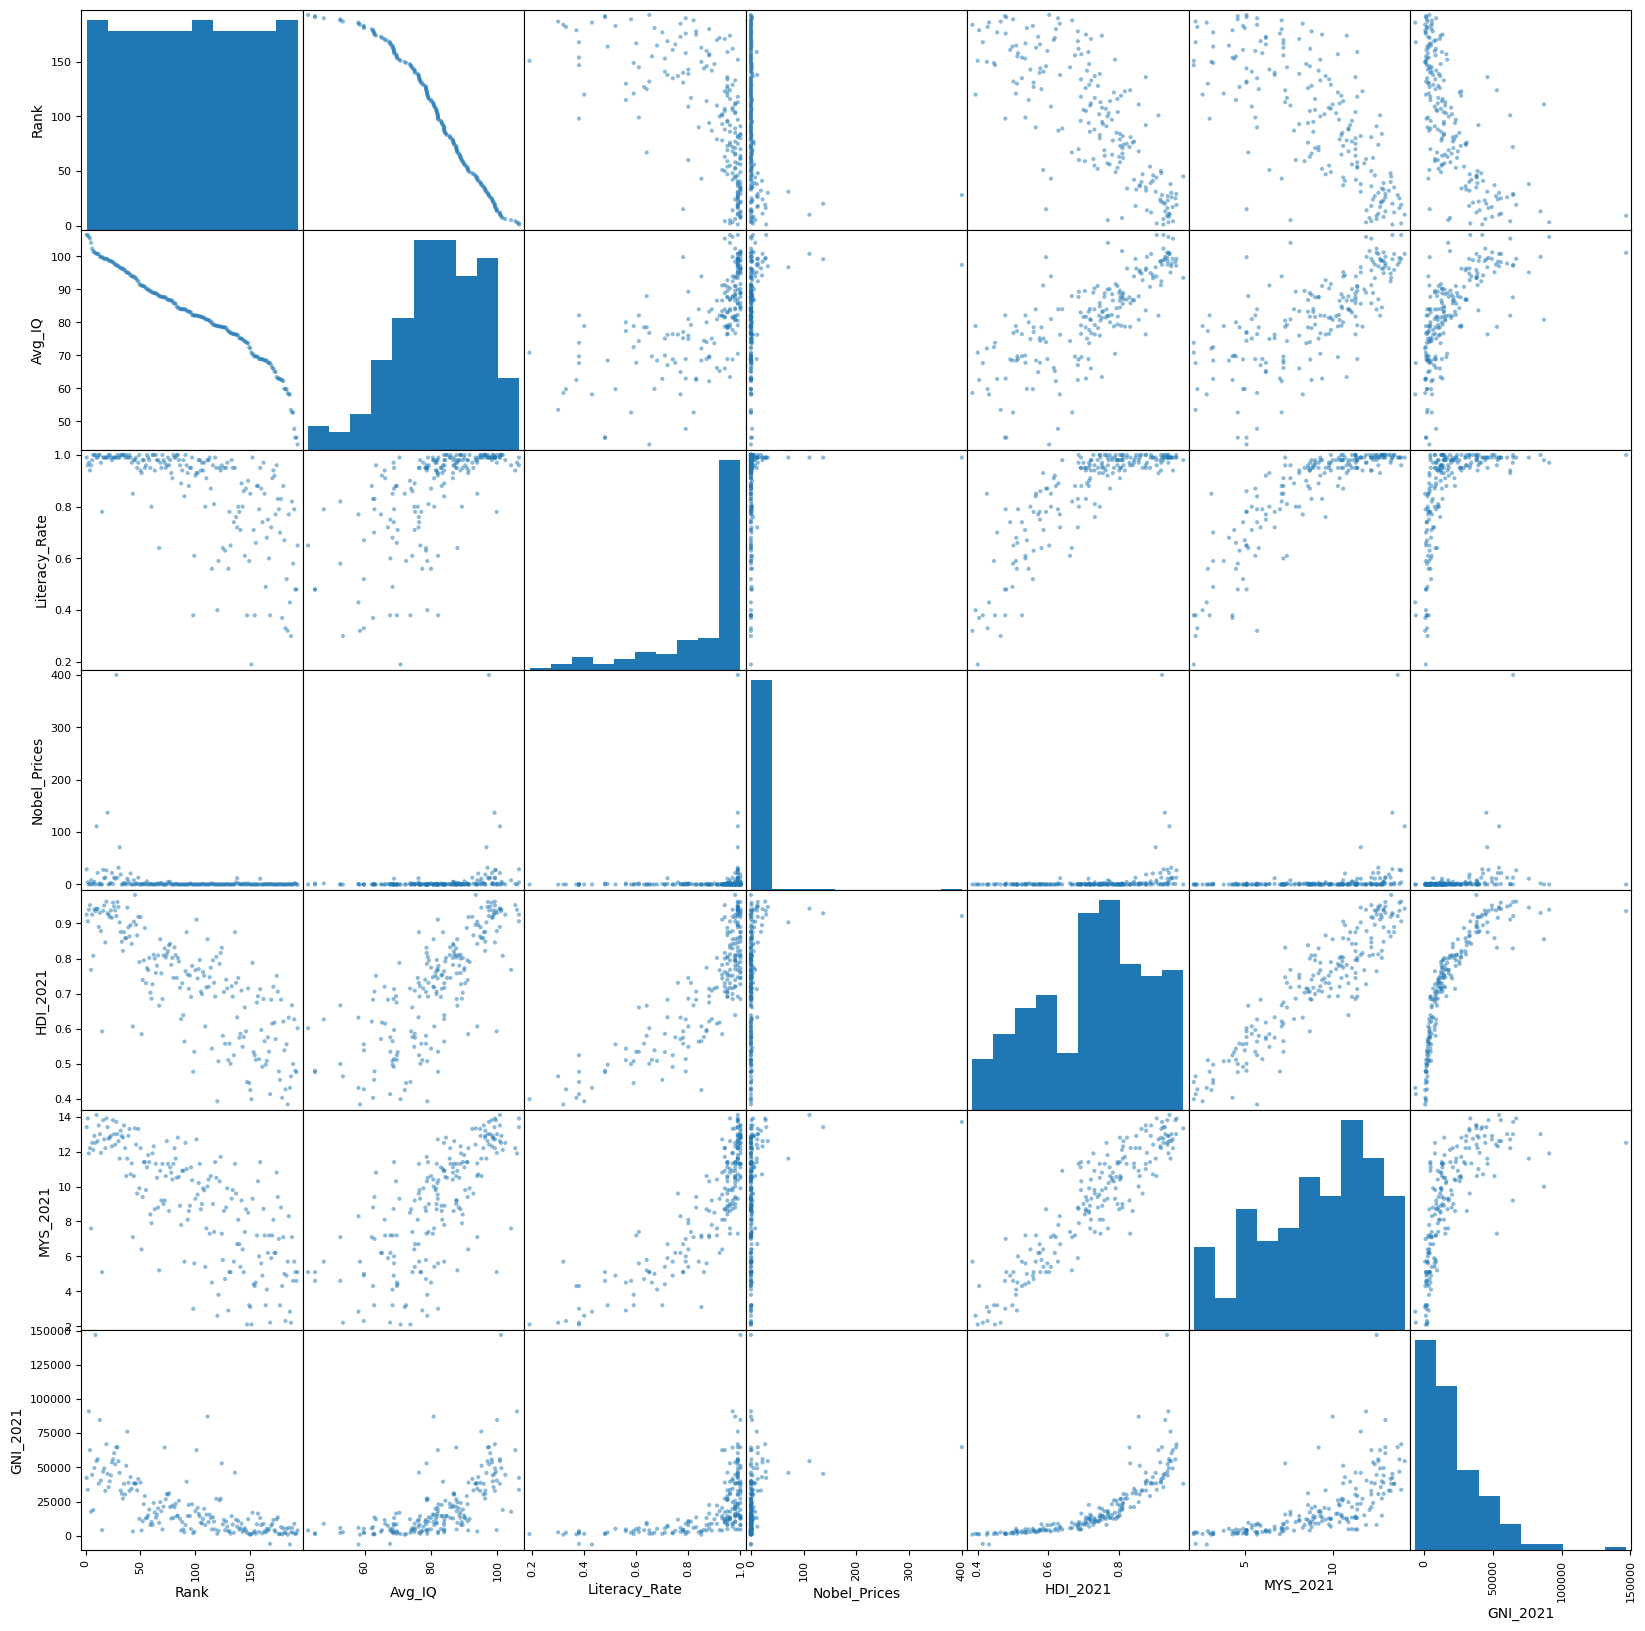

In [9]:
pd.plotting.scatter_matrix(iq_data, figsize=(20,20), diagonal= "hist")
plt.show()

- **HDI has a linear relationship with Avg_IQ, Literracy_rate and MYS**
- **Avg_iq has a linear relationship with HDI and MYS**

## **Maps** 🗺️

 **Add ISO code to dataset**

In [10]:
data = iq_data["Country"]
df = pd.DataFrame(data)

# Function to get ISO code based on country name
def get_iso_code(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        # Handle the case where the country name is not found
        return None

# Add a column for ISO code
df['ISO_Code'] = df['Country'].apply(get_iso_code)

# Display the updated DataFrame
print(df)

SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='US-GA', country_code='US', name='Georgia', parent_code=None, type='State')
SubdivisionHierarchy(code='US-PR', country_code='US', name='Puerto Rico', parent_code=None, type='Outlying area')
SubdivisionHierarchy(code='US-MP', country_code='US', name='Northern Mariana Islands', parent_code=None, type='Outlying area')
SubdivisionHierarchy(code='PA-8', country_code='PA', name='Panamá', parent_code=None, type='Province')
SubdivisionHierarchy(code='NG-NI', country_code='NG', name='Niger', parent_code=None, type='State')
SubdivisionHierarchy(code='SH-HL', country_code='SH', name='Saint Helena', parent_code=None, type='Geographical entity'

In [11]:
iq_data_loc = pd.concat([df["ISO_Code"],iq_data],axis=1)
iq_data_loc.head()

,ISO_Code,Country,Continent,population_2023,Rank,Avg_IQ,Literacy_Rate,Nobel_Prices,HDI_2021,MYS_2021,GNI_2021
0,JPN,Japan,Asia,123294513,1.0,106.48,0.99,29.0,0.925,13.4,42274.0
1,TWN,Taiwan,Asia,10143543,2.0,106.47,0.96,4.0,0.906,13.9,33565.0
2,SGP,Singapore,Asia,6014723,3.0,105.89,0.97,0.0,0.939,11.9,90919.0
3,HKG,Hong Kong,Asia,7491609,4.0,105.37,0.94,1.0,0.952,12.2,62607.0
4,CHN,China,Asia,1425671352,5.0,104.10,0.96,8.0,0.768,7.6,17504.0


## **Avg_IQ Map** 🧠🗺️

In [12]:
fig = px.choropleth(iq_data_loc,locations='ISO_Code', color='Avg_IQ', hover_name='Country', color_continuous_scale='Agsunset',projection='natural earth',title='Avg IQ')

fig.update_layout(height=500, width=800)
fig.show()


## **Highest continent with Agv_iq** 🧠🌎

In [13]:
cont = iq_data_loc[["Continent" , "population_2023" , "Rank" , "Avg_IQ" , "Literacy_Rate" , "Nobel_Prices" , "HDI_2021" , "MYS_2021" , "GNI_2021"]]

In [14]:

cont['Avg_IQ'] = pd.to_numeric(cont['Avg_IQ'], errors='coerce')

cont_group = cont.groupby('Continent')['Avg_IQ'].mean()

cont_group_sorted = cont_group.sort_values(ascending=False)

print(cont_group_sorted)


Continent
Europe             94.904878
North America      94.540000
Europe/Asia        89.196667
Oceania            88.134000
Asia               85.804375
South America      83.783333
Central America    75.113043
Africa             68.566346
Name: Avg_IQ, dtype: float64


/tmp/ipykernel_18/3793435272.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Highest country in each continent** 🌏😎

In [15]:
#Max country for each continent
max_avg_iq_countries = iq_data_loc.loc[iq_data_loc.groupby('Continent')['Avg_IQ'].idxmax()]
max_avg_iq_countries[["Country","Continent", "Avg_IQ"]]

,Country,Continent,Avg_IQ
78,Mauritius,Africa,86.56
0,Japan,Asia,106.48
48,Barbados,Central America,91.60
6,Belarus,Europe,101.60
33,Russia,Europe/Asia,96.29
15,Canada,North America,99.52
16,Australia,Oceania,99.24
54,Suriname,South America,90.29


## **Lowest country in each continent** 🌏😜

In [16]:
#Min country for each continent
min_avg_iq_countries = iq_data_loc.loc[iq_data_loc.groupby('Continent')['Avg_IQ'].idxmin()]
min_avg_iq_countries[["Country","Continent", "Avg_IQ"]]

,Country,Continent,Avg_IQ
190,Liberia,Africa,45.07
192,Nepal,Asia,42.99
189,Guatemala,Central America,47.72
103,Albania,Europe,81.75
83,Georgia,Europe/Asia,84.50
68,Mexico,North America,87.73
126,Papua New Guinea,Oceania,78.49
133,Bolivia,South America,76.53


## **Europe america map** 🌍

In [17]:
fig.update_geos(
    visible=False, resolution=110, scope="europe",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

## **Africa map** 🌍

In [18]:
fig.update_geos(
    visible=False, resolution=110, scope="africa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

## **Asia map** 🌏

In [19]:
fig.update_geos(
    visible=False, resolution=110, scope="asia",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

## **North america map** 🌎

In [20]:
fig.update_geos(
    visible=False, resolution=110, scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

## **South america map** 🌍

In [21]:
fig.update_geos(
    visible=False, resolution=110, scope="south america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

## **Number of Nobel Prices for each continent** 🏆

In [22]:
#Nobil
nob =iq_data_loc.groupby('Continent').sum()
nob["Nobel_Prices"]

Continent
Africa              26.0
Asia                79.0
Central America      6.0
Europe             573.0
Europe/Asia          2.0
North America      431.0
Oceania             15.0
South America       11.0
Name: Nobel_Prices, dtype: float64

## **Highest country in each continent with HDI** 🌏🧐

In [23]:
max_HDIcountries = iq_data_loc.loc[iq_data_loc.groupby('Continent')['HDI_2021'].idxmax()]
max_HDIcountries[["Country","Continent", "HDI_2021"]]

,Country,Continent,HDI_2021
78,Mauritius,Africa,0.802
3,Hong Kong,Asia,0.952
73,Bahamas,Central America,0.812
18,Switzerland,Europe,0.962
75,Türkiye,Europe/Asia,0.838
44,Bermuda,North America,0.981
16,Australia,Oceania,0.951
67,Chile,South America,0.855


## **Lowest country in each continent with HDI** 🌏🤓

In [24]:
min_HDIcountries = iq_data_loc.loc[iq_data_loc.groupby('Continent')['HDI_2021'].idxmin()]
min_HDIcountries[["Country","Continent", "HDI_2021"]]

,Country,Continent,HDI_2021
183,South Sudan,Africa,0.385
176,Yemen,Asia,0.455
98,Haiti,Central America,0.535
56,Moldavia,Europe,0.767
83,Georgia,Europe/Asia,0.802
68,Mexico,North America,0.758
126,Papua New Guinea,Oceania,0.558
95,Venezuela,South America,0.691


## **Correlation matrix**

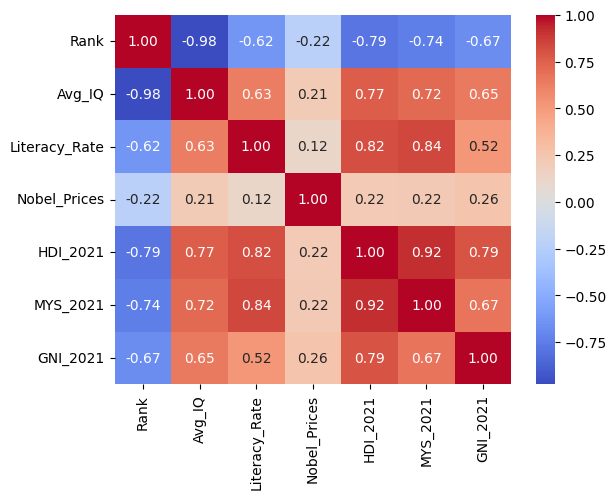

In [25]:
# Select only numeric columns for correlation calculation
numeric_iq_data_loc = iq_data_loc.select_dtypes(include=['number'])

# Calculate correlation and plot heatmap
sns.heatmap(numeric_iq_data_loc.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# **Models**

## **Multiple linear regression**

In [26]:
mlr = smf.ols("Avg_IQ ~ HDI_2021 + Literacy_Rate + MYS_2021 + GNI_2021",data = iq_data_loc).fit()

In [27]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Avg_IQ   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     68.75
Date:                Fri, 17 May 2024   Prob (F-statistic):           9.14e-36
Time:                        15:45:47   Log-Likelihood:                -686.34
No. Observations:                 193   AIC:                             1383.
Df Residuals:                     188   BIC:                             1399.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        41.0920      5.290      7.768      0.000      30.656      51.528
HDI_2021         43.4549     14.005      3.103      0.002      15.828      71.082
Literacy_Rate     3.5146      6.883      0.511      0.610     -10.064      17.093
MYS_2021          0.5016      0.537      0.934      0.352      -0.558       1.561
GNI_2021       8.851e-05   5.11e-05      1.730      0.085   -1.24e-05       0.000
==============================================================================
Omnibus:                       15.406   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.776
Skew:                          -0.465   Prob(JB):                     6.87e-06
Kurtosis:                       4.447   Cond. No.                     7.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **R-squared and Adj. R-squared:** R-squared is **0.594**, indicating that the model explains **59.4%** of the variance in Avg_IQ. **Adj. R-squared** is **0.585**, which accounts for the number of predictors in the model.

- **F-statistic and Prob (F-statistic):** F-statistic is 68.75, and the **p-value (Prob F-statistic) is 9.14e-36.** This suggests that **the overall model is statistically significant.**


- **Intercept (41.0920):** represents the average value of Avg_IQ **when all other predictors are zero.** 

- **HDI_2021 (43.4549):** For each one-unit increase in HDI_2021, the **Avg_IQ is expected to increase by 43.4549**. 

- **Literacy_Rate (3.5146):** For each one-unit increase in Literacy_Rate, the **Avg_IQ is expected to increase by 3.5146**. 

- **MYS_2021 (0.5016):** For each one-unit increase in MYS_2021, the **Avg_IQ is expected to increase by 0.5016**. 

- **GNI_2021 (8.851e-05):** For each one-unit increase in GNI_2021, the **Avg_IQ is expected to increase by 8.851e-05**. 

- **𝐻0: 𝛽1 = 𝛽2 = 0 Vs. 𝐻1: Not all 𝛽 s are zero**

- All coefficients have p-values more than **0.05**, suggesting that they are **not statistically significant** **except the HDI_2021**. 

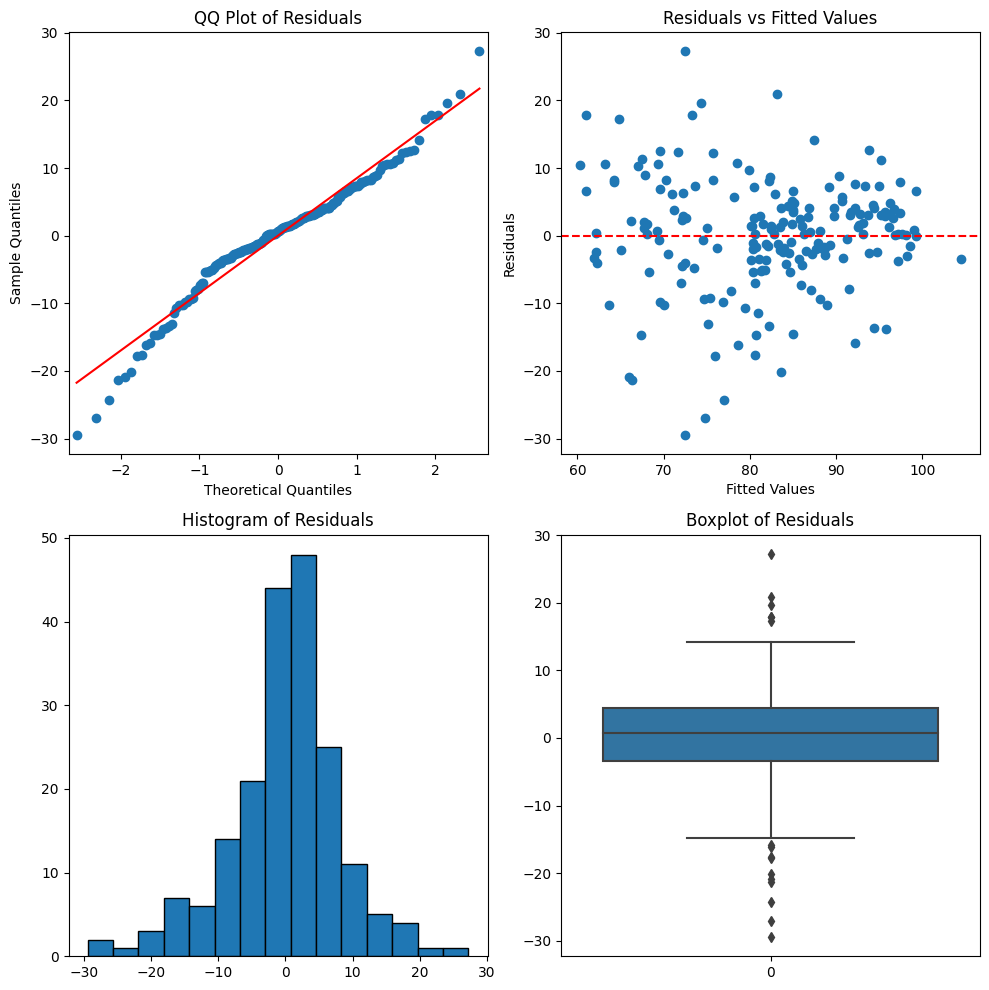

In [28]:
residuals = mlr.resid
fitted = mlr.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The **QQplot** shows some deviation from the straight-line pattern indicating a distribution **with heavier tails** than a normal distribution.

- This plot of residuals versus fits shows that the residual variance **not equal**.


## **1. Simple Linear Regression Model** 📈

In [29]:
lr = smf.ols("Avg_IQ ~ HDI_2021",data = iq_data_loc).fit()

In [30]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Avg_IQ   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     270.6
Date:                Fri, 17 May 2024   Prob (F-statistic):           1.91e-38
Time:                        15:45:48   Log-Likelihood:                -688.17
No. Observations:                 193   AIC:                             1380.
Df Residuals:                     191   BIC:                             1387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.8782      2.993     11.318      0.000      27.974      39.782
HDI_2021      66.3821      4.036     16.449      0.000      58.422      74.342
==============================================================================
Omnibus:                       17.373   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.181
Skew:                          -0.531   Prob(JB):                     2.06e-06
Kurtosis:                       4.458   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared and Adj. R-squared:** **R-squared is 0.586**, indicating that the model explains **58.6%** of the variance in Avg_IQ.
**Adj. R-squared** is **0.584**, which adjusts for the number of predictors in the model.

- **F-statistic and Prob (F-statistic):** The F-statistic is 270.6, and the p-value **(Prob F-statistic) is 1.91e-38**. This suggests that the overall model is **highly statistically significant**.

- **Intercept (33.8782):** The intercept represents the average value of Avg_IQ when the independent variable is zero.

- **HDI_2021 (66.3821):** For each one-unit increase in HDI_2021, the Avg_IQ is expected to increase by **66.3821**.

- **𝐻0: 𝛽1 = 0 [There is no linear relationship (the slope is zero).]**
- **𝐻1: 𝛽1 ≠ 0 [There is a linear relationship (the slope is not zero).]**

- we ***reject the null hypothesis***. This suggests that there is a statistically significant relationship between ***"HDI_2021"*** and the ***"Avg_iq"***.

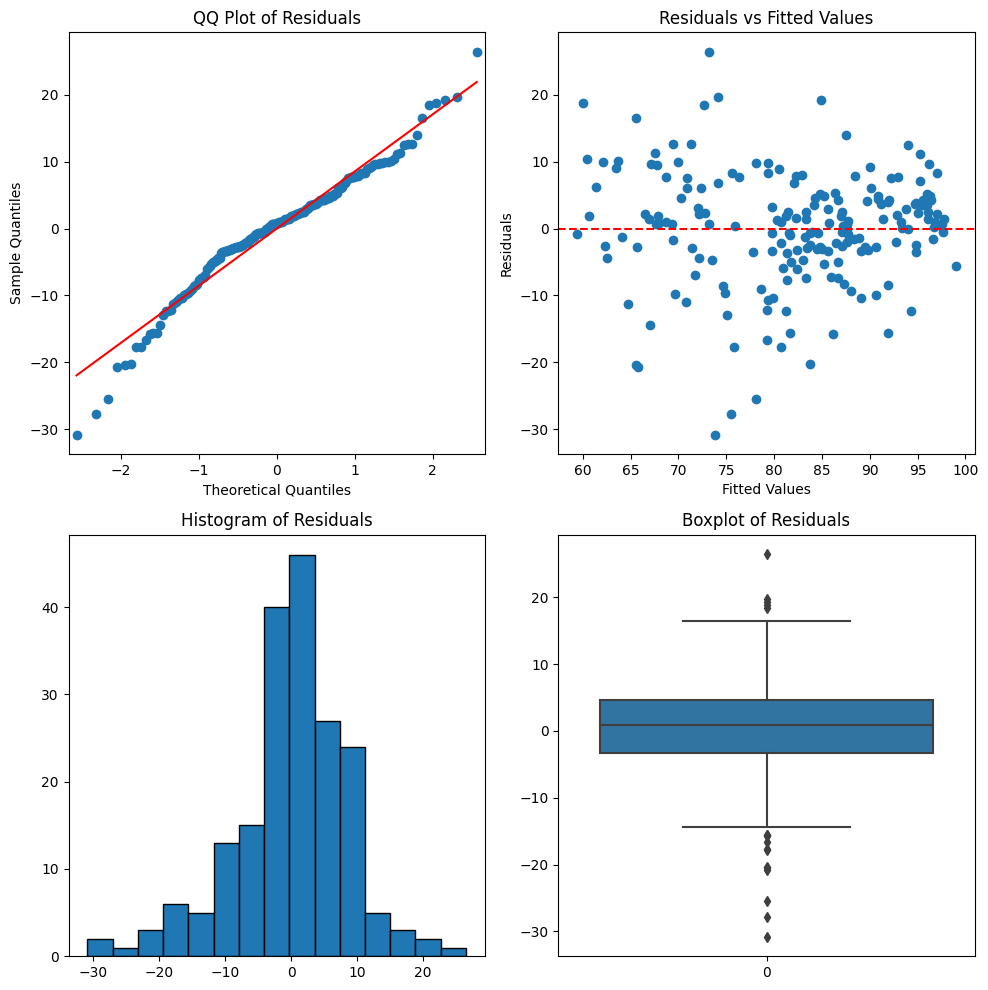

In [31]:
residuals = lr.resid
fitted = lr.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The **QQplot** shows some deviation from the straight-line pattern indicating a distribution **with heavier tails** than a normal distribution.

- This plot of residuals versus fits shows that the residual variance **not equal**.

## **2. Model - Transform Y**

In [32]:
lm_trans_y = smf.ols("np.log(Avg_IQ) ~ HDI_2021",data = iq_data_loc).fit()

In [33]:
lm_trans_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Avg_IQ)   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     230.5
Date:                Fri, 17 May 2024   Prob (F-statistic):           1.16e-34
Time:                        15:45:49   Log-Likelihood:                 138.74
No. Observations:                 193   AIC:                            -273.5
Df Residuals:                     191   BIC:                            -266.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7802      0.041     91.644      0.000       3.699       3.862
HDI_2021       0.8443      0.056     15.181      0.000       0.735       0.954
==============================================================================
Omnibus:                       52.553   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.397
Skew:                          -1.155   Prob(JB):                     5.37e-31
Kurtosis:                       6.464   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared and Adj. R-squared:** R-squared is **0.547**, indicating that the **model explains 54.7%** of the variance in the natural logarithm of Avg_IQ. **Adj. R-squared** is **0.544**, which adjusts for the number of predictors in the model.


- **F-statistic and Prob (F-statistic):** The F-statistic is 230.5, and the p-value **(Prob F-statistic) is 1.16e-34**. This suggests that **the overall model is highly statistically significant.**

- **Intercept (3.7802):** The intercept represents the estimated natural logarithm of Avg_IQ when HDI_2021 is zero.

- **HDI_2021 (0.8443):** For each one-unit increase in HDI_2021, the natural **logarithm of Avg_IQ** is expected to **increase by 0.8443**. 

- **𝐻0: 𝛽1 = 0 [There is no linear relationship (the slope is zero).]**
- **𝐻1: 𝛽1 ≠ 0 [There is a linear relationship (the slope is not zero).]**

- we ***reject the null hypothesis***. This suggests that there is a statistically significant relationship between ***"HDI_2021"*** and the ***"Avg_iq"***.

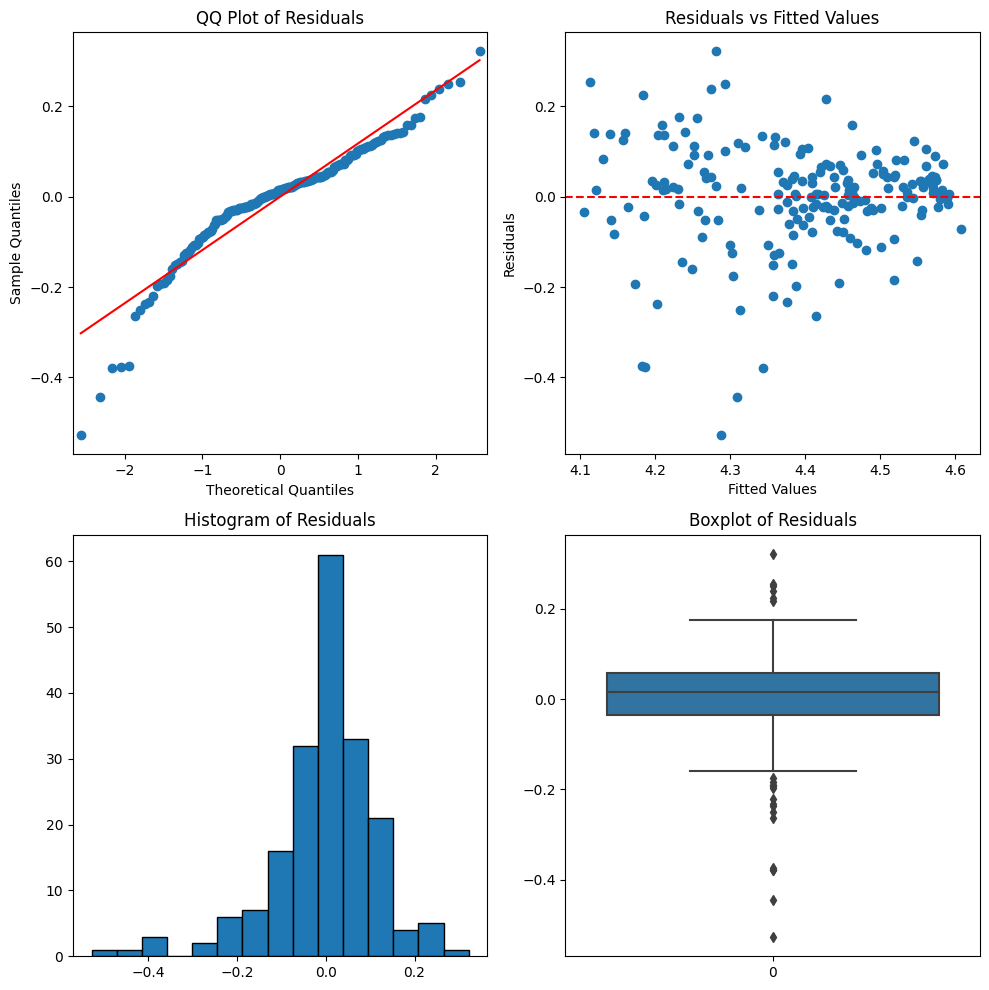

In [34]:
residuals = lm_trans_y.resid
fitted = lm_trans_y.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The **QQplot** shows some deviation from the straight-line pattern indicating a distribution **with heavier tails** than a normal distribution.

- This plot of residuals versus fits shows that the residual variance **not equal**.

## **3. Model - Transform X**

In [35]:
lm_trans_x = smf.ols("Avg_IQ ~ np.log(HDI_2021)",data = iq_data_loc).fit()

In [36]:
lm_trans_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Avg_IQ   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     236.0
Date:                Fri, 17 May 2024   Prob (F-statistic):           3.35e-35
Time:                        15:45:51   Log-Likelihood:                -695.69
No. Observations:                 193   AIC:                             1395.
Df Residuals:                     191   BIC:                             1402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           96.9478      1.164     83.277      0.000      94.652      99.244
np.log(HDI_2021)    43.1248      2.807     15.361      0.000      37.587      48.662
==============================================================================
Omnibus:                       17.743   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.206
Skew:                          -0.584   Prob(JB):                     5.54e-06
Kurtosis:                       4.283   Cond. No.                         4.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared and Adj. R-squared:** **R-squared is 0.553**, indicating that **the model explains 55.3%** of the variance in Avg_IQ. **Adj. R-squared is 0.550**, which adjusts for the number of predictors in the model.

- **F-statistic and Prob (F-statistic):** The F-statistic is 236.0, and the p-value **(Prob F-statistic) is 3.35e-35**. This suggests that **the overall model is highly statistically significant.**

- **Intercept (96.9478):** The intercept represents the estimated value of Avg_IQ when the natural logarithm of HDI_2021 is zero.

- **np.log(HDI_2021) (43.1248):** For each one-unit increase in the natural logarithm of HDI_2021, Avg_IQ is **expected to increase by 43.1248**.

- - **𝐻0: 𝛽1 = 0 [There is no linear relationship (the slope is zero).]**
- **𝐻1: 𝛽1 ≠ 0 [There is a linear relationship (the slope is not zero).]**

- we ***reject the null hypothesis***. This suggests that there is a statistically significant relationship between ***"HDI_2021"*** and the ***"Avg_iq"***.

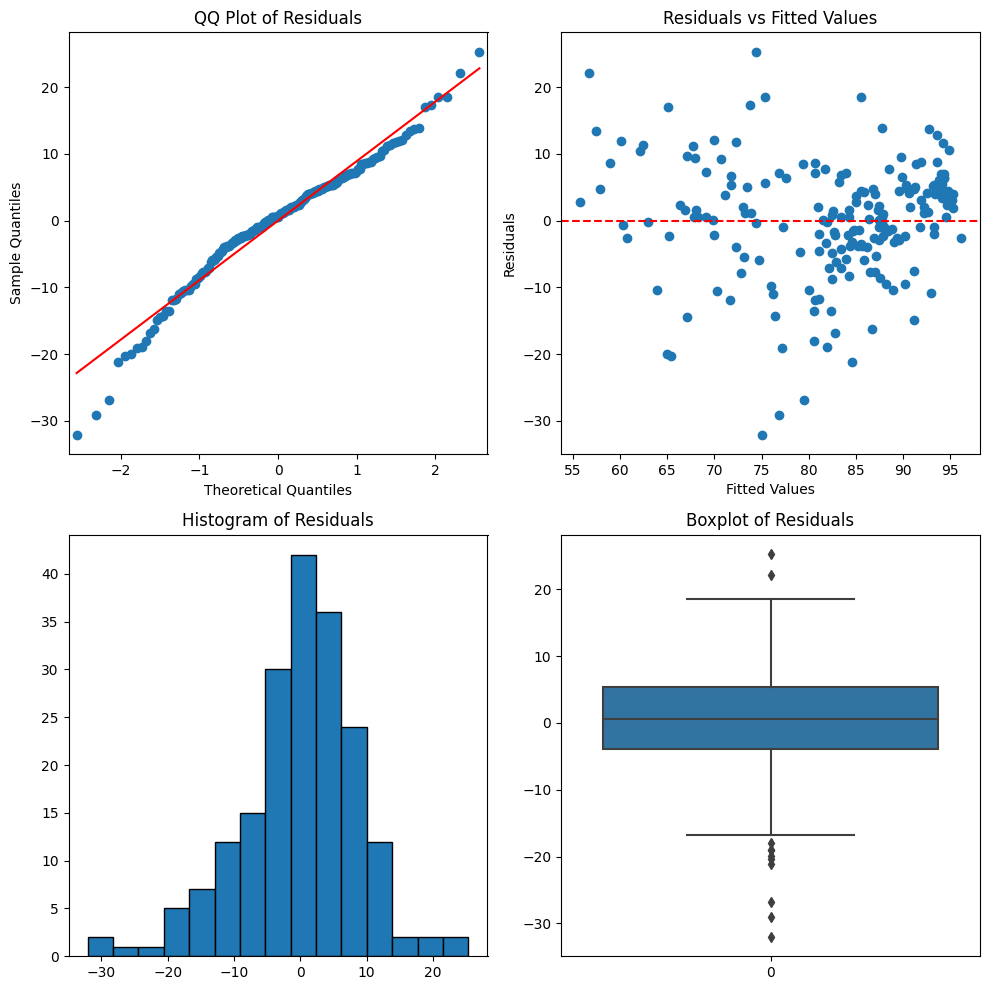

In [37]:
residuals = lm_trans_x.resid
fitted = lm_trans_x.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The histogram **seems bell-shaped** and symmetric, while the **QQplot** has points reasonably close to the line—both suggest that **the normality assumption seem plausible.**

- This plot of residuals versus fits shows that the residual variance **not equal**.

## **4. Model - Transformation X and Y**

In [38]:
lm_trans_x_y = smf.ols("np.log(Avg_IQ) ~ np.log(HDI_2021)",data = iq_data_loc).fit()

In [39]:
lm_trans_x_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Avg_IQ)   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     208.3
Date:                Fri, 17 May 2024   Prob (F-statistic):           2.05e-32
Time:                        15:45:52   Log-Likelihood:                 133.53
No. Observations:                 193   AIC:                            -263.1
Df Residuals:                     191   BIC:                            -256.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5834      0.016    289.147      0.000       4.552       4.615
np.log(HDI_2021)     0.5517      0.038     14.433      0.000       0.476       0.627
==============================================================================
Omnibus:                       52.943   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.274
Skew:                          -1.180   Prob(JB):                     4.22e-30
Kurtosis:                       6.354   Cond. No.                         4.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

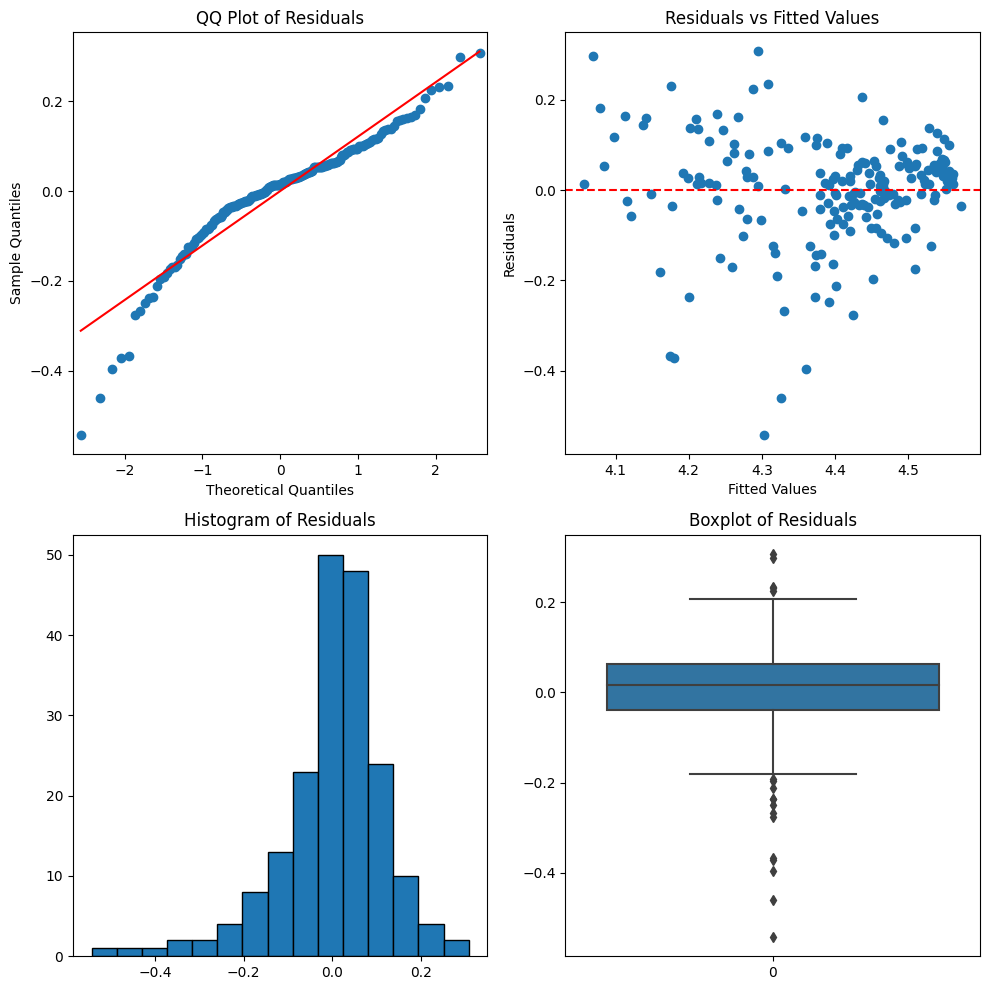

In [40]:
residuals = lm_trans_x_y.resid
fitted = lm_trans_x_y.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


- The **QQplot** shows some deviation from the straight-line pattern indicating a distribution **with heavier tails** than a normal distribution.

- This plot of residuals versus fits shows that the residual variance **not equal**.

# **OutLires**

In [41]:
influence = oi.OLSInfluence(lr).summary_frame()
influence = influence[["cooks_d", "standard_resid", "hat_diag", "student_resid"]]
influence

,cooks_d,standard_resid,hat_diag,student_resid
0,0.012142,1.311106,0.013930,1.313594
1,0.013254,1.456430,0.012342,1.460747
2,0.009925,1.133953,0.015202,1.134807
3,0.007915,0.972553,0.016461,0.972414
4,0.014108,2.243176,0.005576,2.267362
...,...,...,...,...
188,0.023705,-1.686787,0.016390,-1.695038
189,0.038761,-3.241597,0.007323,-3.325882
190,0.055369,-2.433458,0.018357,-2.465602
191,0.055286,-2.402832,0.018791,-2.433598


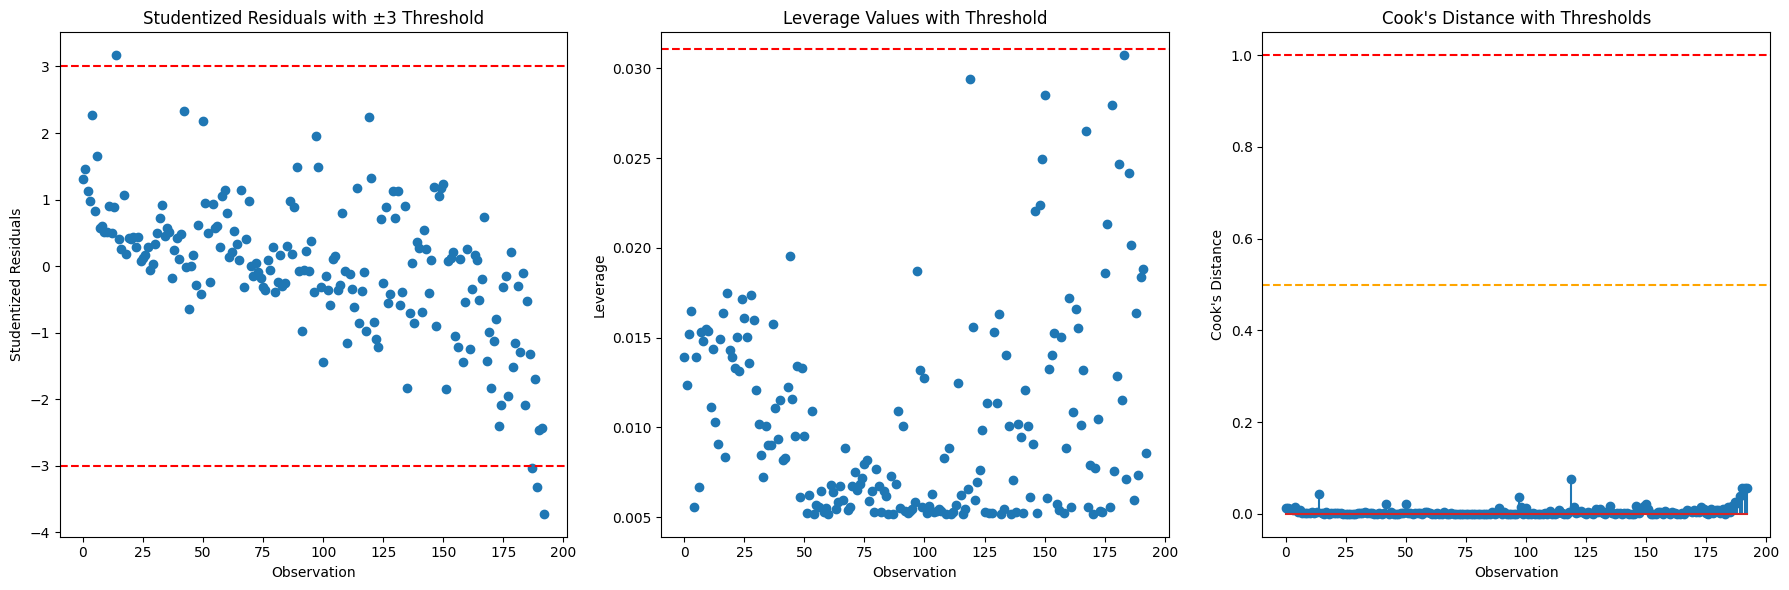

In [42]:
k = len(lm_trans_x.params) - 1  # subtracting 1 for the intercept
n = len(iq_data)

# Thresholds
leverage_threshold = 3 * (k + 1) / n
cooks_d_threshold1 = 0.5  # Somewhat influential
cooks_d_threshold2 = 1    # Excessively influential

# Create subplots for each criterion
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Studentized Residuals Plot
axs[0].scatter(range(n), influence["student_resid"])
axs[0].axhline(y=3, color='red', linestyle='--')
axs[0].axhline(y=-3, color='red', linestyle='--')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Studentized Residuals')
axs[0].set_title('Studentized Residuals with ±3 Threshold')

# Leverage Plot
axs[1].scatter(range(n), influence["hat_diag"])
axs[1].axhline(y=leverage_threshold, color='red', linestyle='--')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Leverage')
axs[1].set_title('Leverage Values with Threshold')

# Cook's Distance Plot
axs[2].stem(influence["cooks_d"])
axs[2].axhline(y=cooks_d_threshold1, color='orange', linestyle='--')
axs[2].axhline(y=cooks_d_threshold2, color='red', linestyle='--')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel("Cook's Distance")
axs[2].set_title("Cook's Distance with Thresholds")

plt.tight_layout()
plt.show()

# **ANOVA**

In [43]:
Anova_model = smf.ols('Avg_IQ ~ Continent', data=iq_data_loc).fit()

anova_table = sm.stats.anova_lm(Anova_model, typ=2)

print (anova_table)

                 sum_sq     df         F        PR(>F)
Continent  19196.022699    7.0  33.93113  4.173505e-30
Residual   14951.563672  185.0       NaN           NaN


The ANOVA output indicates that there is a statistically significant difference in the means of the groups defined by "Continent."

# **Conclusion**

We have concluded that the most influential factor in IQ is Human Development Index (HDI) is a composite index used to measure and rank countries' average achievements in three basic dimensions of human development:

- **Health:** Measured by life expectancy at birth.
- **Education:** Measured by mean years of schooling and expected years of schooling.
- **Standard of Living:** Measured by gross national income (GNI) per capita, adjusted for purchasing power parity (PPP).

- **Investment in Education:** Quality Education: Enhance the quality of education systems, ensuring that students receive effective instruction and have access to resources that promote critical thinking and problem-solving skills.

- **Early Childhood Education:** Focus on early childhood education to provide a strong foundation for cognitive development.

- **Access to Healthcare:** Ensure universal access to quality healthcare, including preventive and early intervention services, to support overall health and cognitive development.
Nutrition Programs: Implement programs to address malnutrition and provide adequate nutrition, especially during critical periods of growth and development.

- **Family and Community Support:** Strengthen family and community support systems to provide a nurturing environment for children, fostering positive emotional and cognitive development.
Mental Health Services: Address mental health issues and provide accessible mental health services to support cognitive well-being.
Poverty Reduction:

- **Economic Opportunities:** Implement policies and programs that reduce poverty and provide economic opportunities, as socioeconomic status can impact access to education and health services.

- **Cognitive Enrichment:** Promote cognitive stimulation in various environments, including schools, homes, and communities, to encourage continuous learning and intellectual engagement.
Cultural and Recreational Activities: Support cultural and recreational activities that contribute to cognitive development.
Technology and Innovation:

- **Access to Technology:** Ensure widespread access to technology and promote digital literacy to harness the benefits of technological advancements for educational purposes.
Innovation in Education: Explore innovative approaches to education, including adaptive learning technologies and online resources.
Policy Integration:

- **Cognitive Research:** Invest in research to better understand the factors influencing cognitive development and intelligence.
Monitoring and Evaluation: Implement effective monitoring and evaluation systems to assess the impact of interventions on cognitive development.

- **Community Involvement:** Encourage community engagement and involvement in decision-making processes related to education, health, and socio-economic development.
